EXPERIMENT 4

15. Network Architecture : Activation function in hidden layer -->Relu , hidden layer : (60 , 60) , learning rate : 1.0 batch size : 10 , epochs : 50

Epoch 1, Loss: 10.1313, Training Accuracy: 0.0987
Epoch 2, Loss: 2.5138, Training Accuracy: 0.0974
Epoch 3, Loss: 2.5177, Training Accuracy: 0.1044
Epoch 4, Loss: 2.5162, Training Accuracy: 0.0975
Epoch 5, Loss: 2.5120, Training Accuracy: 0.0987
Epoch 6, Loss: 2.5179, Training Accuracy: 0.0986
Epoch 7, Loss: 2.5204, Training Accuracy: 0.0993
Epoch 8, Loss: 2.5163, Training Accuracy: 0.0993
Epoch 9, Loss: 2.5104, Training Accuracy: 0.0986
Epoch 10, Loss: 2.5215, Training Accuracy: 0.0974
Epoch 11, Loss: 2.5179, Training Accuracy: 0.0993
Epoch 12, Loss: 2.5141, Training Accuracy: 0.0974
Epoch 13, Loss: 2.5171, Training Accuracy: 0.0993
Epoch 14, Loss: 2.5136, Training Accuracy: 0.1124
Epoch 15, Loss: 2.5133, Training Accuracy: 0.0987
Epoch 16, Loss: 2.5153, Training Accuracy: 0.0974
Epoch 17, Loss: 2.5158, Training Accuracy: 0.0974
Epoch 18, Loss: 2.5128, Training Accuracy: 0.1044
Epoch 19, Loss: 2.5149, Training Accuracy: 0.1022
Epoch 20, Loss: 2.5076, Training Accuracy: 0.0975
Epoch 21

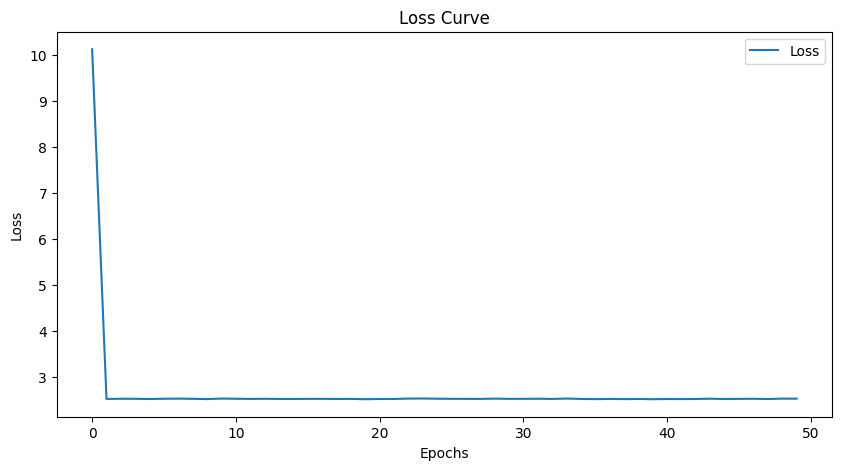

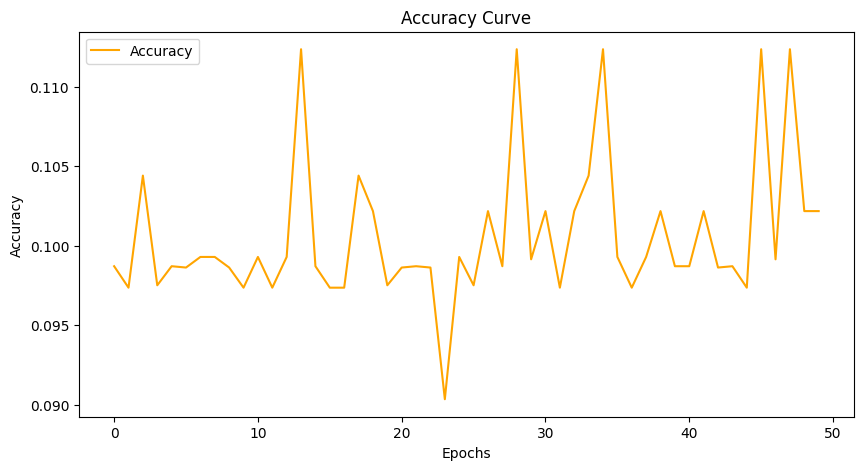

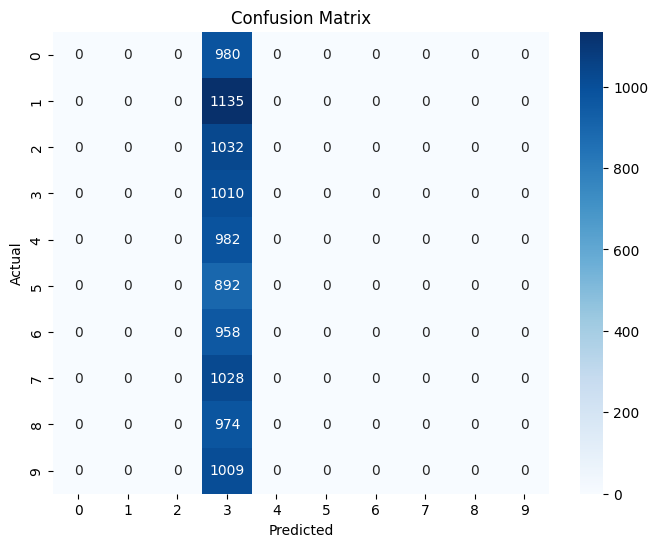

Execution Time: 14831.84 seconds


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the MNIST dataset
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    image = tf.reshape(image, [-1])  # Flatten to 784
    label = tf.one_hot(label, depth=10)  # Convert to one-hot encoding
    return image, label

# Load dataset and apply preprocessing
mnist_dataset = tfds.load("mnist", split=["train", "test"], as_supervised=True)
train_data = mnist_dataset[0].map(preprocess).shuffle(10000).batch(10)
test_data = mnist_dataset[1].map(preprocess).batch(10)

# Define neural network parameters
input_size = 784
hidden_layer1_size = 60
hidden_layer2_size = 60
output_size = 10
learning_rate = 1.0
epochs = 50

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([input_size, hidden_layer1_size]))
b1 = tf.Variable(tf.zeros([hidden_layer1_size]))
W2 = tf.Variable(tf.random.normal([hidden_layer1_size, hidden_layer2_size]))
b2 = tf.Variable(tf.zeros([hidden_layer2_size]))
W_out = tf.Variable(tf.random.normal([hidden_layer2_size, output_size]))
b_out = tf.Variable(tf.zeros([output_size]))

# Forward pass function
def forward_pass(X):
    hidden_layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, W2) + b2)
    output_layer = tf.matmul(hidden_layer2, W_out) + b_out  # No activation (logits)
    return output_layer

# Define loss function
def loss_fn(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

# Define optimizer
optimizer = tf.optimizers.Adam(learning_rate)

# Training step function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        logits = forward_pass(X)
        loss = loss_fn(logits, Y)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W_out, b_out])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W_out, b_out]))
    return loss

# Compute accuracy
def compute_accuracy(dataset):
    total_correct = 0
    total_samples = 0
    for X, Y in dataset:
        logits = forward_pass(X)
        correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
        total_correct += tf.reduce_sum(tf.cast(correct_pred, tf.float32))
        total_samples += X.shape[0]
    return total_correct / total_samples

# Track loss and accuracy
loss_history = []
accuracy_history = []
start_time = time.time()

# Training loop
for epoch in range(epochs):
    avg_loss = 0
    total_batches = 0

    for batch_x, batch_y in train_data:
        loss = train_step(batch_x, batch_y)
        avg_loss += loss
        total_batches += 1

    avg_loss /= total_batches
    train_acc = compute_accuracy(train_data)
    loss_history.append(avg_loss.numpy())
    accuracy_history.append(train_acc.numpy())
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Training Accuracy: {train_acc:.4f}")

end_time = time.time()
execution_time = end_time - start_time

# Test the model
test_acc = compute_accuracy(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Compute confusion matrix
y_true, y_pred = [], []
for X, Y in test_data:
    logits = forward_pass(X)
    predictions = tf.argmax(logits, axis=1).numpy()
    labels = tf.argmax(Y, axis=1).numpy()
    y_pred.extend(predictions)
    y_true.extend(labels)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Execution Time: {execution_time:.2f} seconds")